In [3]:
!pip install transformers
!pip install ktrain

     |████████████████████████████████| 25.3 MB 1.4 MB/s 
     |████████████████████████████████| 22.3 MB 1.2 MB/s 
     |████████████████████████████████| 981 kB 55.7 MB/s 
     |████████████████████████████████| 263 kB 68.5 MB/s 
     |████████████████████████████████| 2.8 MB 35.8 MB/s 
     |████████████████████████████████| 1.2 MB 49.9 MB/s 
     |████████████████████████████████| 468 kB 66.3 MB/s 
     |████████████████████████████████| 3.3 MB 51.5 MB/s 
  Created wheel for ktrain: filename=ktrain-0.29.2-py3-none-any.whl size=25294171 sha256=234c5361b1feed0efb3f63c10644ba1b1f67bf38b13f29ba3c7943a8af86782d
  Stored in directory: /root/.cache/pip/wheels/db/b1/ad/94fe0ceeaa8ed0319e74773cba99b6aa6192998b1035adc295
  Created wheel for seqeval: filename=seqeval-0.0.19-py3-none-any.whl size=9931 sha256=818e4e1af03bca11eef3e66ab266863b3b72c14c04f079c9360f00dfb90a284f
  Stored in directory: /root/.cache/pip/wheels/f5/ac/f1/4e13d7aff05c722d142b7d20a88ad63f9aab11b895411241a4
  Created wheel 

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import ktrain

from ktrain import text
from sklearn.model_selection import train_test_split

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data_train = pd.read_csv('drive/MyDrive/covid-asi-pasaport-calisma/dataset/preprocessed_all_countries_combined_comments.csv')
data_train.dropna(inplace=True)

In [7]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"] = "0";

In [8]:
# splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(data_train['body'],\
                                                      data_train['label'],\
                                                      test_size=0.1,\
                                                      random_state=0)

In [9]:
# Building model with transformer
model_name = 'distilbert-base-uncased'

trans = text.Transformer(model_name, maxlen=512)

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [10]:
X_train.values

array(['level paranoia simple thing like temporary vaccine passport live oppressive thought erase public private database let datum steal sell use identify blackmail stuff like point time day government hacker literally wipe existence lose nhs number passport record birth certificate record paye record pension contribution bank account time good luck prove illegal immigrant right work record wipe document deem forge I guess begin day think exist database vaccine record different democratic country balance power problem ids',
       'I reply post I receive thailand pass today I california usa I submit jpg image paper vaccine card dose qr code passport number I digital covid 19 vaccine record I use microsoft paint crop qr code digital covid 19 vaccine record I submit qr code jpg image qr code dose thailand pass automatically approve minute article digital vaccination certificate state usa provide',
       'vaccine passport work', ...,
       'headline passport month backlog holiday risk 

In [11]:
X_train = X_train.values.astype(str).tolist()
y_train = y_train.values.astype(str).tolist()

X_test = X_test.values.astype(str).tolist()
y_test = y_test.values.astype(str).tolist()

In [12]:
train_data = trans.preprocess_train(X_train, y_train)
test_data = trans.preprocess_test(X_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 48
	95percentile : 150
	99percentile : 329


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 47
	95percentile : 142
	99percentile : 335


In [13]:
# getting mbert-base model.
model = trans.get_classifier()

Downloading:   0%|          | 0.00/363M [00:00<?, ?B/s]

In [14]:
learner = ktrain.get_learner(model, train_data = train_data, val_data = test_data, batch_size = 16)

In [15]:
history = learner.fit_onecycle(1e-4, 3)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/3
627/627 [==============================] - 578s 903ms/step - loss: 0.6216 - accuracy: 0.7305 - val_loss: 0.3278 - val_accuracy: 0.8717
Epoch 2/3
627/627 [==============================] - 578s 919ms/step - loss: 0.2910 - accuracy: 0.8951 - val_loss: 0.2001 - val_accuracy: 0.9336
Epoch 3/3
627/627 [==============================] - 578s 919ms/step - loss: 0.0979 - accuracy: 0.9694 - val_loss: 0.1738 - val_accuracy: 0.9435


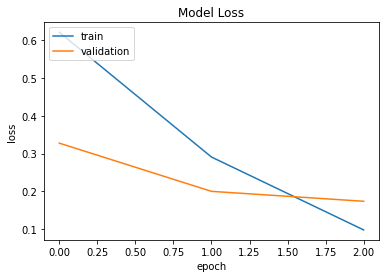

In [16]:
learner.plot('loss')

In [17]:
learner.validate()

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       328
           1       0.98      0.95      0.96       202
           2       0.95      0.96      0.95       585

    accuracy                           0.94      1115
   macro avg       0.95      0.94      0.94      1115
weighted avg       0.94      0.94      0.94      1115



array([[301,   2,  25],
       [  6, 191,   5],
       [ 23,   2, 560]])